In [ ]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Instagram Data RBE v0.2.csv')

In [ ]:
df.head()

,Account,User Name,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Views,Benchmark Likes,Benchmark Comments,Benchmark Views,URL,Link,Photo,Description,Overperforming Score (weighted — Likes 1x Comments 1x )
0,Early Childhood Education,right_brain_simplified,NaN,2023-01-02 01:05:30 EST,02/01/2023,01:05:30,Album,"1,517",1351,166,0,111,11,169,https://www.instagram.com/p/Cm5u9ZFocmQ/,https://www.instagram.com/p/Cm5u9ZFocmQ/,https://scontent-sea1-1.cdninstagram.com/v/t51...,0-3 years is that age span which is most negle...,12.43
1,Nalini Sankar| Holistic Parenting | Whole Brai...,nalinizinu,NaN,2022-10-06 01:02:06 EDT,06/10/2022,01:02:06,Album,"3,784",3747,37,0,279,62,0,https://www.instagram.com/p/CjXBwFQjSYJ/,https://www.instagram.com/p/CjXBwFQjSYJ/,https://scontent-sea1-1.cdninstagram.com/v/t51...,“Learning begins at Birth”\n\nSupporting the c...,11.10
2,Nalini Sankar| Holistic Parenting | Whole Brai...,nalinizinu,NaN,2022-04-27 14:18:34 EDT,27/04/2022,14:18:34,Album,"3,146",3016,130,0,279,62,0,https://www.instagram.com/p/Cc3UHytD158/,https://www.instagram.com/p/Cc3UHytD158/,https://scontent-sea1-1.cdninstagram.com/v/t51...,A life lesson learnt today!!! \n\nThis is from...,9.23
3,Nalini Sankar| Holistic Parenting | Whole Brai...,nalinizinu,NaN,2021-01-25 05:11:48 EST,25/01/2021,05:11:48,Photo,"1,060",986,74,0,98,23,0,https://www.instagram.com/p/CKdtIzwD-1H/,https://www.instagram.com/p/CKdtIzwD-1H/,https://scontent-sea1-1.cdninstagram.com/v/t51...,#RBEStarterPack\n\nTo anyone who wants to star...,8.76
4,Nalini Sankar| Holistic Parenting | Whole Brai...,nalinizinu,58341.0,2023-07-06 13:13:12 EDT,06/07/2023,13:13:12,Photo,647,485,162,0,87,35,0,https://www.instagram.com/p/CuXSbt6yqWX/,https://www.instagram.com/p/CuXSbt6yqWX/,https://scontent-sea1-1.cdninstagram.com/v/t51...,Comment “Genius” if you want to register for t...,5.30


In [ ]:
df.shape

(121, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Account                                                    121 non-null    object 
 1   User Name                                                  121 non-null    object 
 2   Followers at Posting                                       15 non-null     float64
 3   Post Created                                               121 non-null    object 
 4   Post Created Date                                          121 non-null    object 
 5   Post Created Time                                          121 non-null    object 
 6   Type                                                       121 non-null    object 
 7   Total Interactions                                         121 non-null    object 
 8   Likes     

In [ ]:
df.rename(columns={'Overperforming Score (weighted  —  Likes 1x Comments 1x )': 'Overperforming Score'}, inplace=True)

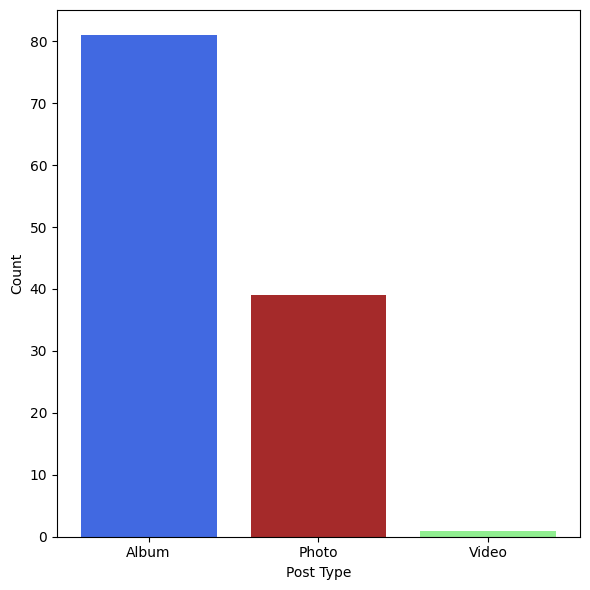

In [ ]:
#ANALYSIS OF NUMBER OF DIFFERENT POSTS IN INSTAGRAM

post_types = {}
for index, row in df.iterrows():
    post_type = row["Type"]
    if post_type not in post_types:
        post_types[post_type] = 0
    post_types[post_type] += 1

# Convert the dictionary to a DataFrame
post_types_df = pd.DataFrame.from_dict(post_types, orient="index", columns=["count"]).reset_index()
post_types_df.columns = ["post_type", "count"]

# Create a bar plot to visualize the post types and counts
color=['royalblue','brown','lightgreen','purple','grey']
plt.figure(figsize=(6, 6))
plt.bar(post_types_df["post_type"], post_types_df["count"],color=color)
plt.xlabel("Post Type")
plt.ylabel("Count")
#plt.xticks(ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#PREPROCESS MESSAGE COLUMN FOR FURTHER ANALYSIS

df['cleanLinks'] = df['Description'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df['cleanLinks'] = df['cleanLinks'].str.replace(r'@\w+', '').str.strip()
df['cleanLinks']

<ipython-input-10-fc626bc0e493>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanLinks'] = df['cleanLinks'].str.replace(r'@\w+', '').str.strip()


0      0-3 years is that age span which is most negle...
1      “Learning begins at Birth”\n\nSupporting the c...
2      A life lesson learnt today!!! \n\nThis is from...
3      #RBEStarterPack\n\nTo anyone who wants to star...
4      Comment “Genius” if you want to register for t...
                             ...                        
116    First Thing First. \nBefore I talk about how w...
117    #RBEbyNaliniZinu \n\nMany Parents ask me if I ...
118    With an increasing demand in this digital worl...
119    “Hey Nalini. I want to train my child for ____...
120    #newmomsguidebynalinizinu\nMany C-sections are...
Name: cleanLinks, Length: 121, dtype: object

In [ ]:
df['cleanLinks'] = df['cleanLinks'].str.replace(r'^www.\S*', '', regex=True).str.strip()
df['cleanLinks'] = df['cleanLinks'].str.replace(r' www.\S*', '', regex=True).str.strip()
#Searches for an instance of ".co"
#Then, looks to match 0 or more surrounding non-whitespace characters considering both preceding and following
#ensures there is at least a single instance of / preceding
df['cleanLinks'] = df['cleanLinks'].str.replace(r'\S*/+\S*.co\S*', '', regex=True).str.strip()
#Same as above, but ensures there is following / rather than preceding
df['cleanLinks'] = df['cleanLinks'].str.replace(r'\S*.co\S*/+\S*', '', regex=True).str.strip()
#Remove the ": " which occurs at the beginning of a tweet as a result
df['cleanLinks'] = df['cleanLinks'].str.replace(r'^: ', '').str.strip()
#Remove instances of "RT :" which are preceded by a space character
df['cleanLinks'] = df['cleanLinks'].str.replace(r' RT :*', '').str.strip()
df['cleanLinks'] = df['cleanLinks'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df['cleanLinks']

<ipython-input-11-cdefa9c6b194>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanLinks'] = df['cleanLinks'].str.replace(r'^: ', '').str.strip()
<ipython-input-11-cdefa9c6b194>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanLinks'] = df['cleanLinks'].str.replace(r' RT :*', '').str.strip()
<ipython-input-11-cdefa9c6b194>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanLinks'] = df['cleanLinks'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


0      0-3 years is that age span which is most negle...
1      Learning begins at Birth\n\nSupporting the chi...
2      A life lesson learnt today \n\nThis is from a ...
3      #RBEStarterPack\n\nTo anyone who wants to star...
4      Comment Genius if you want to register for the...
                             ...                        
116    First Thing First. \nBefore I talk about how w...
117    #RBEbyNaliniZinu \n\nMany Parents ask me if I ...
118    With an increasing demand in this digital worl...
119    Hey Nalini. I want to train my child for _____...
120    #newmomsguidebynalinizinu\nMany C-sections are...
Name: cleanLinks, Length: 121, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)
df['filtered_cleanLinks']=df['cleanLinks'].apply(remove_stopwords)

In [ ]:
def word_tokenize(text):
  tokens = nltk.word_tokenize(text)
  return tokens

df['tokenised_cleanLinks']=df['filtered_cleanLinks'].apply(word_tokenize)
df['tokenised_cleanLinks']

0      [0-3, years, age, span, neglected, underutiliz...
1      [Learning, begins, Birth, Supporting, child, c...
2      [A, life, lesson, learnt, today, This, Mom, No...
3      [#, RBEStarterPack, To, anyone, wants, start, ...
4      [Comment, Genius, want, register, Free, Webina...
                             ...                        
116    [First, Thing, First, ., Before, I, talk, tryi...
117    [#, RBEbyNaliniZinu, Many, Parents, ask, I, sh...
118    [With, increasing, demand, digital, world, ,, ...
119    [Hey, Nalini, ., I, want, train, child, _____,...
120    [#, newmomsguidebynalinizinu, Many, C-sections...
Name: tokenised_cleanLinks, Length: 121, dtype: object

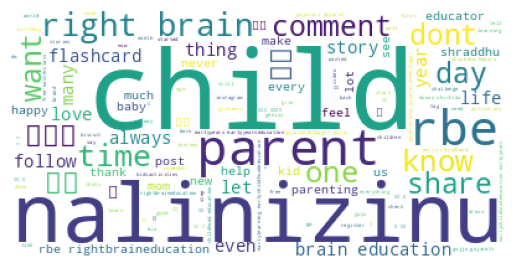

In [ ]:
# WORD CLOUD ANALYSIS OF INSTAGRAM POST CAPTIONS

comment_words = ''
stopwords = set(STOPWORDS)

for words in df['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='white').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#SENTIMENT ANALYSIS OF INSTAGRAM CAPTION TEXTS

sia = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
  sentiment=sia.polarity_scores(text)
  compound_score=sentiment['compound']
  return compound_score

df['sentiment']=df['filtered_cleanLinks'].apply(get_sentiment)
df['sentiment']

0      0.9953
1      0.4939
2     -0.3412
3      0.6633
4      0.5574
        ...  
116    0.9710
117    0.3018
118    0.4588
119    0.9936
120   -0.5673
Name: sentiment, Length: 121, dtype: float64

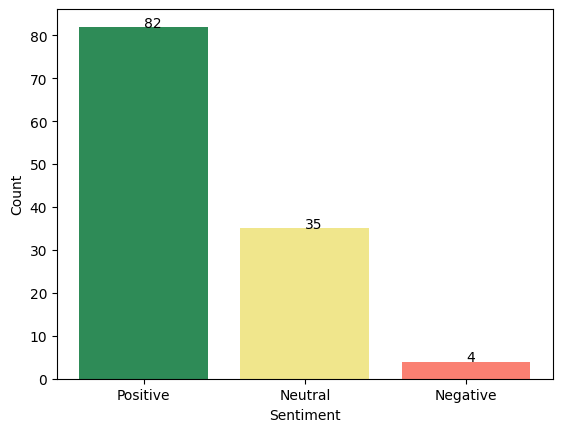

In [ ]:
sentiment_count=pd.cut(df['sentiment'],bins=3,labels=['Negative','Neutral','Positive']).value_counts()
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])
color=['seagreen','khaki','salmon']
plt.bar(sentiment_count.index,sentiment_count.values,color=color)
addlabels(sentiment_count.index,sentiment_count.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

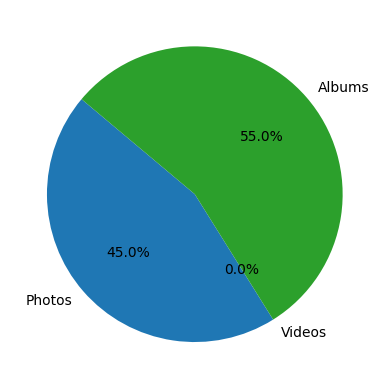

In [ ]:
#ANALYSIS OF TOP PERFORMING POSTS

photo_count=0
album_count=0
video_count=0

df_score=df.sort_values(by='Overperforming Score',ascending=False)
top_40_rows=df_score.iloc[:40]

for index,row in top_40_rows.iterrows():
  if row['Type']=='Photo':
    photo_count +=1
  elif row['Type']=='Video':
    video_count +=1
  elif row['Type']=='Album':
    album_count +=1
photo_percentage=(photo_count/len(df['Type']))*100
video_percentage=(video_count/len(df['Type']))*100
album_percentage=(album_count/len(df['Type']))*100

labels=['Photos','Videos','Albums']
sizes=[photo_percentage,video_percentage,album_percentage]


plt.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=140)
plt.show()

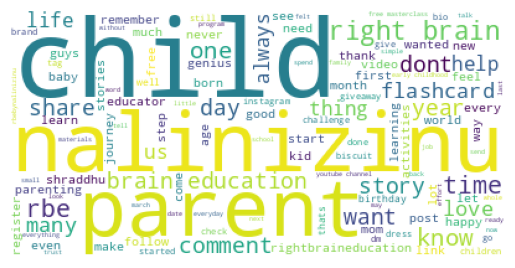

In [ ]:
#LEXICAL ANALYSIS OF POSITIVE AND NEGATIVE POSTS

positive_sentiments=df.loc[df['sentiment']>0]
negative_sentiments=df.loc[df['sentiment']<0]
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for words in positive_sentiments['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='White').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

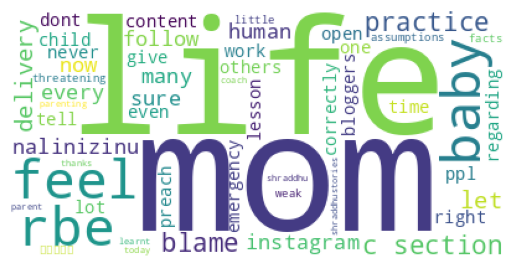

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for words in negative_sentiments['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='White').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
positive_sentence_tokens = positive_sentiments['filtered_cleanLinks'].apply(nltk.word_tokenize)

positive_sentence_tokens[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0     [0-3, years, age, span, neglected, underutiliz...
1     [Learning, begins, Birth, Supporting, child, c...
3     [#, RBEStarterPack, To, anyone, wants, start, ...
4     [Comment, Genius, want, register, Free, Webina...
5     [#, NEWlaunch, Never, thought, I, would, step,...
6     [Right, Brain, Education, ultimately, helps, h...
7     [Our, cozy, house, As, child, I, remember, par...
8     [Finally, poured, To, Mom, toughest, role, lif...
9     [Finally, I, holding, Passion, A, 15, months, ...
10    [Its, teacher, makes, difference, ,, classroom...
Name: filtered_cleanLinks, dtype: object

In [ ]:
positive_sentiment_pos_tag=positive_sentiments['filtered_cleanLinks'].apply(lambda text: pos_tag(text.split(' ')))
positive_sentiment_pos_tag[:10]

0     [(0-3, CD), (years, NNS), (age, NN), (span, RB...
1     [(Learning, VBG), (begins, NNS), (Birth, NNP),...
3     [(#RBEStarterPack, NN), (To, TO), (anyone, NN)...
4     [(Comment, NN), (Genius, NNP), (want, VBP), (r...
5     [(#NEWlaunch, NN), (Never, NNP), (thought, VBD...
6     [(Right, RB), (Brain, NNP), (Education, NNP), ...
7     [(Our, PRP$), (cozy, NN), (house, NN), (As, IN...
8     [(Finally, RB), (poured, VBN), (To, TO), (Mom,...
9     [(Finally, RB), (I, PRP), (holding, VBG), (Pas...
10    [(Its, PRP$), (teacher, NN), (makes, VBZ), (di...
Name: filtered_cleanLinks, dtype: object

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
negative_sentence_tokens = negative_sentiments['filtered_cleanLinks'].apply(nltk.word_tokenize)
negative_sentence_tokens[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2      [A, life, lesson, learnt, today, This, Mom, No...
71     [Lets, Open, Lets, stop, feeling, insecurities...
115    [I, ignored, recent, blames, put, RBE, ,, I, c...
120    [#, newmomsguidebynalinizinu, Many, C-sections...
Name: filtered_cleanLinks, dtype: object

In [ ]:
negative_sentiment_pos_tag=negative_sentiments['filtered_cleanLinks'].apply(lambda text: pos_tag(text.split(' ')))
negative_sentiment_pos_tag[:10]

2      [(A, DT), (life, NN), (lesson, NN), (learnt, R...
71     [(Lets, NNS), (Open, NNP), (Lets, NNP), (stop,...
115    [(I, PRP), (ignored, VBD), (recent, JJ), (blam...
120    [(#newmomsguidebynalinizinu, RB), (Many, JJ), ...
Name: filtered_cleanLinks, dtype: object